In [5]:
#Artificial Neural network

In [6]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [9]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
## Divide the dataset to independent and depedent dataset


In [11]:
X = dataset.iloc[:,3:13]

In [12]:
Y = dataset["Exited"]

In [13]:
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [14]:
#Feature Engineering

In [15]:
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [16]:
print(geography)

      Germany  Spain
0       False  False
1       False   True
2       False  False
3       False  False
4       False   True
...       ...    ...
9995    False  False
9996    False  False
9997    False  False
9998     True  False
9999    False  False

[10000 rows x 2 columns]


In [17]:
##Concatenate the variable with dataframe

In [18]:
X = X.drop(['Geography', 'Gender'], axis = 1)

In [19]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [20]:
#Concatenating process

In [21]:
X = pd.concat([X,geography,gender], axis = 1)

In [22]:
#Splitting the dataset into training and test set

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [25]:
## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [29]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [30]:
X_train.shape

(8000, 11)

In [31]:
X_test.shape

(2000, 11)

In [32]:
## Part 2 Now lets create the ANN

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [59]:
##Initializing the ANN
classifier = Sequential()

In [60]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [61]:
#adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [62]:
##adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [63]:
##adding the output layer
classifier.add(Dense(1,activation='sigmoid'))
classifier.add(Dropout(0.2))

In [65]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [66]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [67]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [68]:
model_history = classifier.fit(X_train,Y_train,validation_split = 0.33,batch_size =10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5346 - loss: 1.2223 - val_accuracy: 0.7959 - val_loss: 0.4733
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7883 - loss: 0.9855 - val_accuracy: 0.7967 - val_loss: 0.4418
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7914 - loss: 0.9451 - val_accuracy: 0.8001 - val_loss: 0.4277
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8096 - loss: 0.9328 - val_accuracy: 0.8054 - val_loss: 0.4207
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8177 - loss: 1.0045 - val_accuracy: 0.8080 - val_loss: 0.4108
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8254 - loss: 1.0096 - val_accuracy: 0.8137 - val_loss: 0.4009
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - accuracy: 0.8280 - loss: 0.9649 - val_accuracy: 0.8217 - val_loss: 0.3996
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8276 - loss: 0.9938 

In [69]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

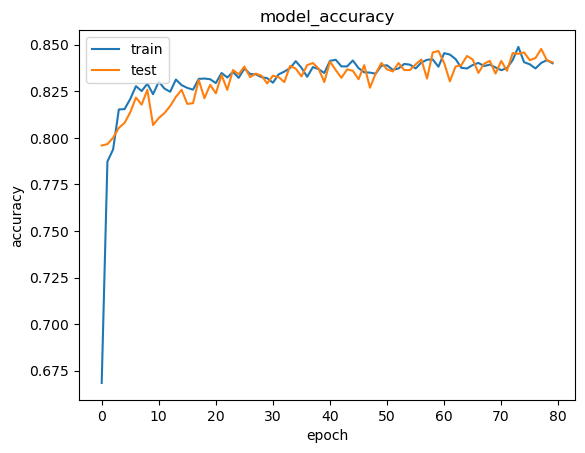

In [70]:
##Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

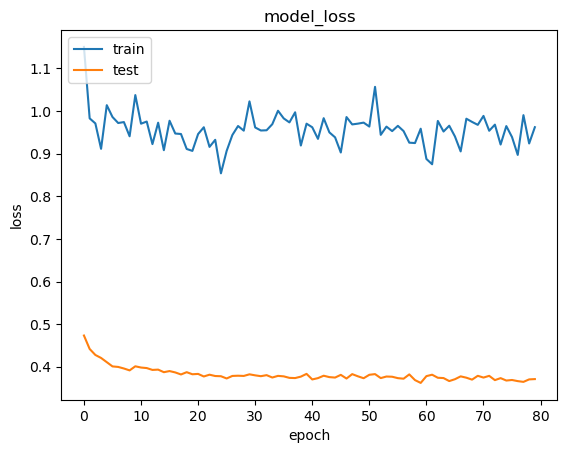

In [71]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [72]:
##Part3 - Making the predictions and evaluating the model
##predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [73]:
##make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[1581,   14],
       [ 279,  126]], dtype=int64)

In [74]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, Y_test)

In [75]:
score

0.8535

In [76]:
##get the weights
classifier.get_weights()

[array([[-5.0469454e-02,  1.1344423e-01, -1.3139778e-01, -8.0038086e-02,
         -1.1253318e-01,  9.4510632e-04,  8.9013383e-02, -8.4784314e-02,
         -1.1492493e-01, -1.0189339e-01, -1.8409194e-01],
        [ 4.0790340e-01,  6.3433015e-01, -3.4465465e-01,  4.1529855e-01,
         -2.1674043e-02, -8.2758552e-01,  9.2506614e-03, -4.2419893e-01,
          4.4479164e-01,  7.1290314e-01, -3.6031461e-01],
        [ 2.3599546e-02, -5.1736534e-03, -9.5551267e-02, -1.2737076e-01,
         -5.2240565e-02, -2.0148313e-01,  1.6725992e-01,  1.4261250e-01,
         -1.6543031e-01, -3.5348912e-03,  2.0913502e-02],
        [-5.0168574e-01, -4.7479177e-01,  6.8567079e-01,  5.3560972e-01,
         -2.5912562e-01, -1.7411514e-01, -2.5568649e-01, -2.0583205e-01,
         -4.9203011e-01,  7.1579844e-02, -2.2060950e-01],
        [-1.1707608e+00, -2.6903275e-01,  4.8154286e-01,  9.9806756e-01,
         -3.4710798e-01,  4.5134237e-01,  6.3721046e-02,  6.9069219e-01,
         -3.1512341e-01,  4.3312073e-0